In [10]:
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import torch
import torch.utils.data as data
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda")


#with open('./test_dataset.csv', newline='') as f:
with open('./Dataset_separated/EbN0_80_learning.csv', newline='') as f:
    reader = csv.reader(f)
    dataset = list(reader)
f.close()    
dataset = dataset[1:len(dataset)]

In [2]:
sample_size = 10000
test_dataset = random.sample(dataset, sample_size)
train_dataset = random.sample(dataset, sample_size)

#test_dataset = torch.tensor(np.array(list(np.float_(test_dataset)))).to(device)
#train_dataset = torch.tensor(np.array(list(np.float_(train_dataset)))).to(device)

#test_datset= torch.from_numpy(list(np.float_(test_dataset)))
#train_dataset = torch.from_numpy(list(np.float_(train_dataset)))

In [3]:
m =nn.ReLU()
#m = nn.LeakyReLU(0.1)
hidden = 3
class mlp(nn.Module):
    def __init__(self):
        super(mlp, self).__init__()
        self.fc1 = nn.Linear(3,hidden)
        self.fc2 = nn.Linear(hidden,hidden)
        self.fc3 = nn.Linear(hidden,hidden)
        self.fc4 = nn.Linear(hidden,1)
        #self.fc5 = nn.Linear(hidden,hidden)
        #self.fc6 = nn.Linear(hidden,hidden)
        #self.fc7 = nn.Linear(hidden,1)
    def forward(self, x):
        x = x.float()
        #print(x)
        '''
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        '''
        x = m(self.fc1(x))
        x = m(self.fc2(x))
        x = m(self.fc3(x))
        #x = m(self.fc4(x))
        #x = m(self.fc5(x))
        #x = m(self.fc6(x))
        x = self.fc4(x)
    
        #return F.log_softmax(h4, dim=1)
        return x


29000 / 30000   Loss :  0.03605763614177704


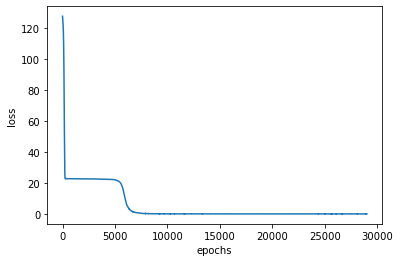

In [4]:
#batch_size = 64

epochs = 30000
lr = 0.001
momentum =0.5

model=mlp().to(device)

#loading_model = "./output/model.pth"
#model = torch.load(loading_model)

#optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
optimizer = optim.Adam(model.parameters(), lr=lr)

loss_fn = nn.MSELoss()
loss_temp = 0
total_loss = []


model.train()
for epoch in range(epochs):
    
    #xx = random.sample(test_dataset, batch_size)
    xx = train_dataset
    xx = torch.tensor(np.array(list(np.float_(xx)))).to(device)
    labels = xx[:,3].float() * 100
    xx =xx[:,0:3]
    
    output = model(xx).squeeze() #Different dimension may cause wrong results of backpropagation(Something called broadcasting)
    #print(xx)
    #print(output, labels)
    loss= loss_fn(output, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #loss_temp = loss_temp + loss.item()
    total_loss.append(loss.item())
    if epoch%1000 == 0:
        clear_output(wait=True)
        print(epoch,'/',epochs,'  Loss : ', loss.item())
        '''
        if epoch == 0:
            total_loss.append(loss_temp)
        else:
            total_loss.append(loss_temp/1000)
        '''
        plt.plot(total_loss)
        plt.xlabel('epochs') #(x 1000)')
        plt.ylabel('loss')
        #plt.ylim(0,1000)
        plt.show()
        loss_temp = 0
        

In [14]:
with open('./Dataset_separated/test_EbN0_80.csv', newline='') as f:
    reader = csv.reader(f)
    dataset = list(reader)
f.close()    
dataset = dataset[1:len(dataset)]

sample_size = 10000
test_dataset = random.sample(dataset, sample_size)


model.eval()
with torch.no_grad():
    xx = test_dataset
    xx = torch.tensor(np.array(list(np.float_(xx)))).to(device)
    labels = xx[:,3].float() * 100
    xx =xx[:,0:3]
    
    output = model(xx).squeeze() #Different dimension may cause wrong results of backpropagation(Something called broadcasting)
    #print(xx)
    #print(output, labels)
    loss= loss_fn(output, labels)
    
    print('Test loss : ', loss.item())
        

Test loss :  0.0308088306337595


In [15]:
output

tensor([10.2996, 13.2698,  5.3790,  ...,  8.9544,  5.0409,  4.3610],
       device='cuda:0')

In [16]:
labels

tensor([10.2000, 13.7000,  5.6000,  ...,  9.1000,  5.1000,  4.2000],
       device='cuda:0')

In [8]:
savePath="./output/model3.pth"

torch.save(model, savePath)